<img style="float:left" width="70%" src="pics/escudo_COLOR_1L_DCHA.png">
<img style="float:right" width="15%" src="pics/PythonLogo.svg">
<br style="clear:both;">

<h2 style="display: inline-block; padding: 4mm; padding-left: 2em; background-color: navy; line-height: 1.3em; color: white; border-radius: 10px;">Contornos activos para segmentación.</h2>

### Contornos activos y *Morphological Snakes*
#### Author: Pedro Latorre Carmona

##### Curso 2025-2026

Versión 1.0

---

## Objetivos de la práctica que quiero realizar

Todo tiene que realizarse en celdas de código con código python y explicaciones en código markdown

Estos son los dos puntos principales

    - Quiero la implementación de *active contours* que hay en la siguiente página web:

https://scikit-image.org/docs/stable/auto_examples/edges/plot_active_contours.html

    - Quiero la implementación de la Metodologia snakes que hay en el repositorio sobre todas las imagenes de la carpeta images:

https://github.com/pmneila/morphsnakes/tree/master


### notas importantes de como realizar la práctica
Importante: Estos métodos los quiero aplicar sobre todas las imágenes completas que hay en la carpeta images, es importante destacar que en esa carpeta estan tambien las imagenes de las mascaras hechas a mano que se van a utilizar para poder comprobar los resultados.

Hay que destacar y una cosa que es importante es que los métodos que hay que usar tienen parámetros y esos hay que modificarlos para que la máscara generada se ajuste de la mejjor manera a la imagen. Yo quiero que me des el mejor resultado posible, es decir quiero que el código que aparezca sea con los mejores parámetros posibles dentro de lo que cabe para que el resutldao sea o intente ser bueno. Luego añadire pruebas en una celda de código aparte para que se vea en que afectan los parámetros mas importantes. Esto quiere decir que tampooc hay que modificar todos los parámetros si no los que mas influenza e importancia tengan en los métodos.

Una vez Aplicados estos métodos de contornos activos quiero ver si funcionan bien. Esto significa que necesito las medidas de evaluacion de sensibilidad especificidad y precisión global. Para las métricas como he dicho antes se pueden usar las máscaras de la carpeta images. Es importante que se muestre la comparacion entre las dos máscaras, es decir, poder ver la imagen de la máscara creada a mano al lado de la creada por el método.

Es muy importante Invenstigar valor de alfa y beta estudio de variación

Un punto muy importante es que quiero explicaciones en código markdown ante sy despues de cada una de las celdas de código en las que se explique en primer lugar que se va a hacer en esa celda y los fundamentos matemáticos de los metodos usados y desmás y luego los resultados esperados y que deberiamos ver y como funcionar.

Fundamental que todo lo que se haga este bien explicado fundamentado y la práctica este bien estructurada, es decir, que sea facil de sguie nada mas abras el notebook.

# ACTIVE CONTOURS

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour
from skimage.draw import polygon2mask
from sklearn.metrics import confusion_matrix
import os

# Configuración de visualización
%matplotlib inline

def calculate_metrics(ground_truth, prediction):
    """
    Calcula Sensibilidad, Especificidad y Accuracy comparando la máscara predicha con la real.
    Las entradas deben ser arrays booleanos o binarios (0 y 1).
    """
    # Aplanar arrays
    gt = ground_truth.flatten().astype(bool)
    pred = prediction.flatten().astype(bool)
    
    tn, fp, fn, tp = confusion_matrix(gt, pred, labels=[False, True]).ravel()
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    
    return sensitivity, specificity, accuracy

def show_comparison(image, gt_mask, pred_mask, title="Resultado"):
    """Muestra la imagen original, la máscara real y la predicha lado a lado."""
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title("Imagen Original")
    ax[0].axis('off')
    
    ax[1].imshow(gt_mask, cmap='gray')
    ax[1].set_title("Ground Truth (Manual)")
    ax[1].axis('off')
    
    ax[2].imshow(pred_mask, cmap='gray')
    ax[2].set_title(f"Predicción\nSens: {metrics[0]:.2f}, Spec: {metrics[1]:.2f}, Acc: {metrics[2]:.2f}")
    ax[2].axis('off')
    
    plt.suptitle(title)
    plt.show()

# Rutas de las imágenes (Ajusta según tu estructura de carpetas real)
# Asumiendo que están en una carpeta 'images/' en el mismo directorio
img_paths = {
    'lakes': ('images/lakes3.jpg', 'images/Mascara_lagos.png'),
    'camera': ('images/camera.png', 'images/Mascara_Fotografo.png'),
    'coins': ('images/coins.png', 'images/Mascara_monedas.png'),
    'starfish': ('images/seastar2.png', 'images/Mascara_estrella.png')
}

Ejecutando Matriz de Geometría (Alpha vs Beta)...


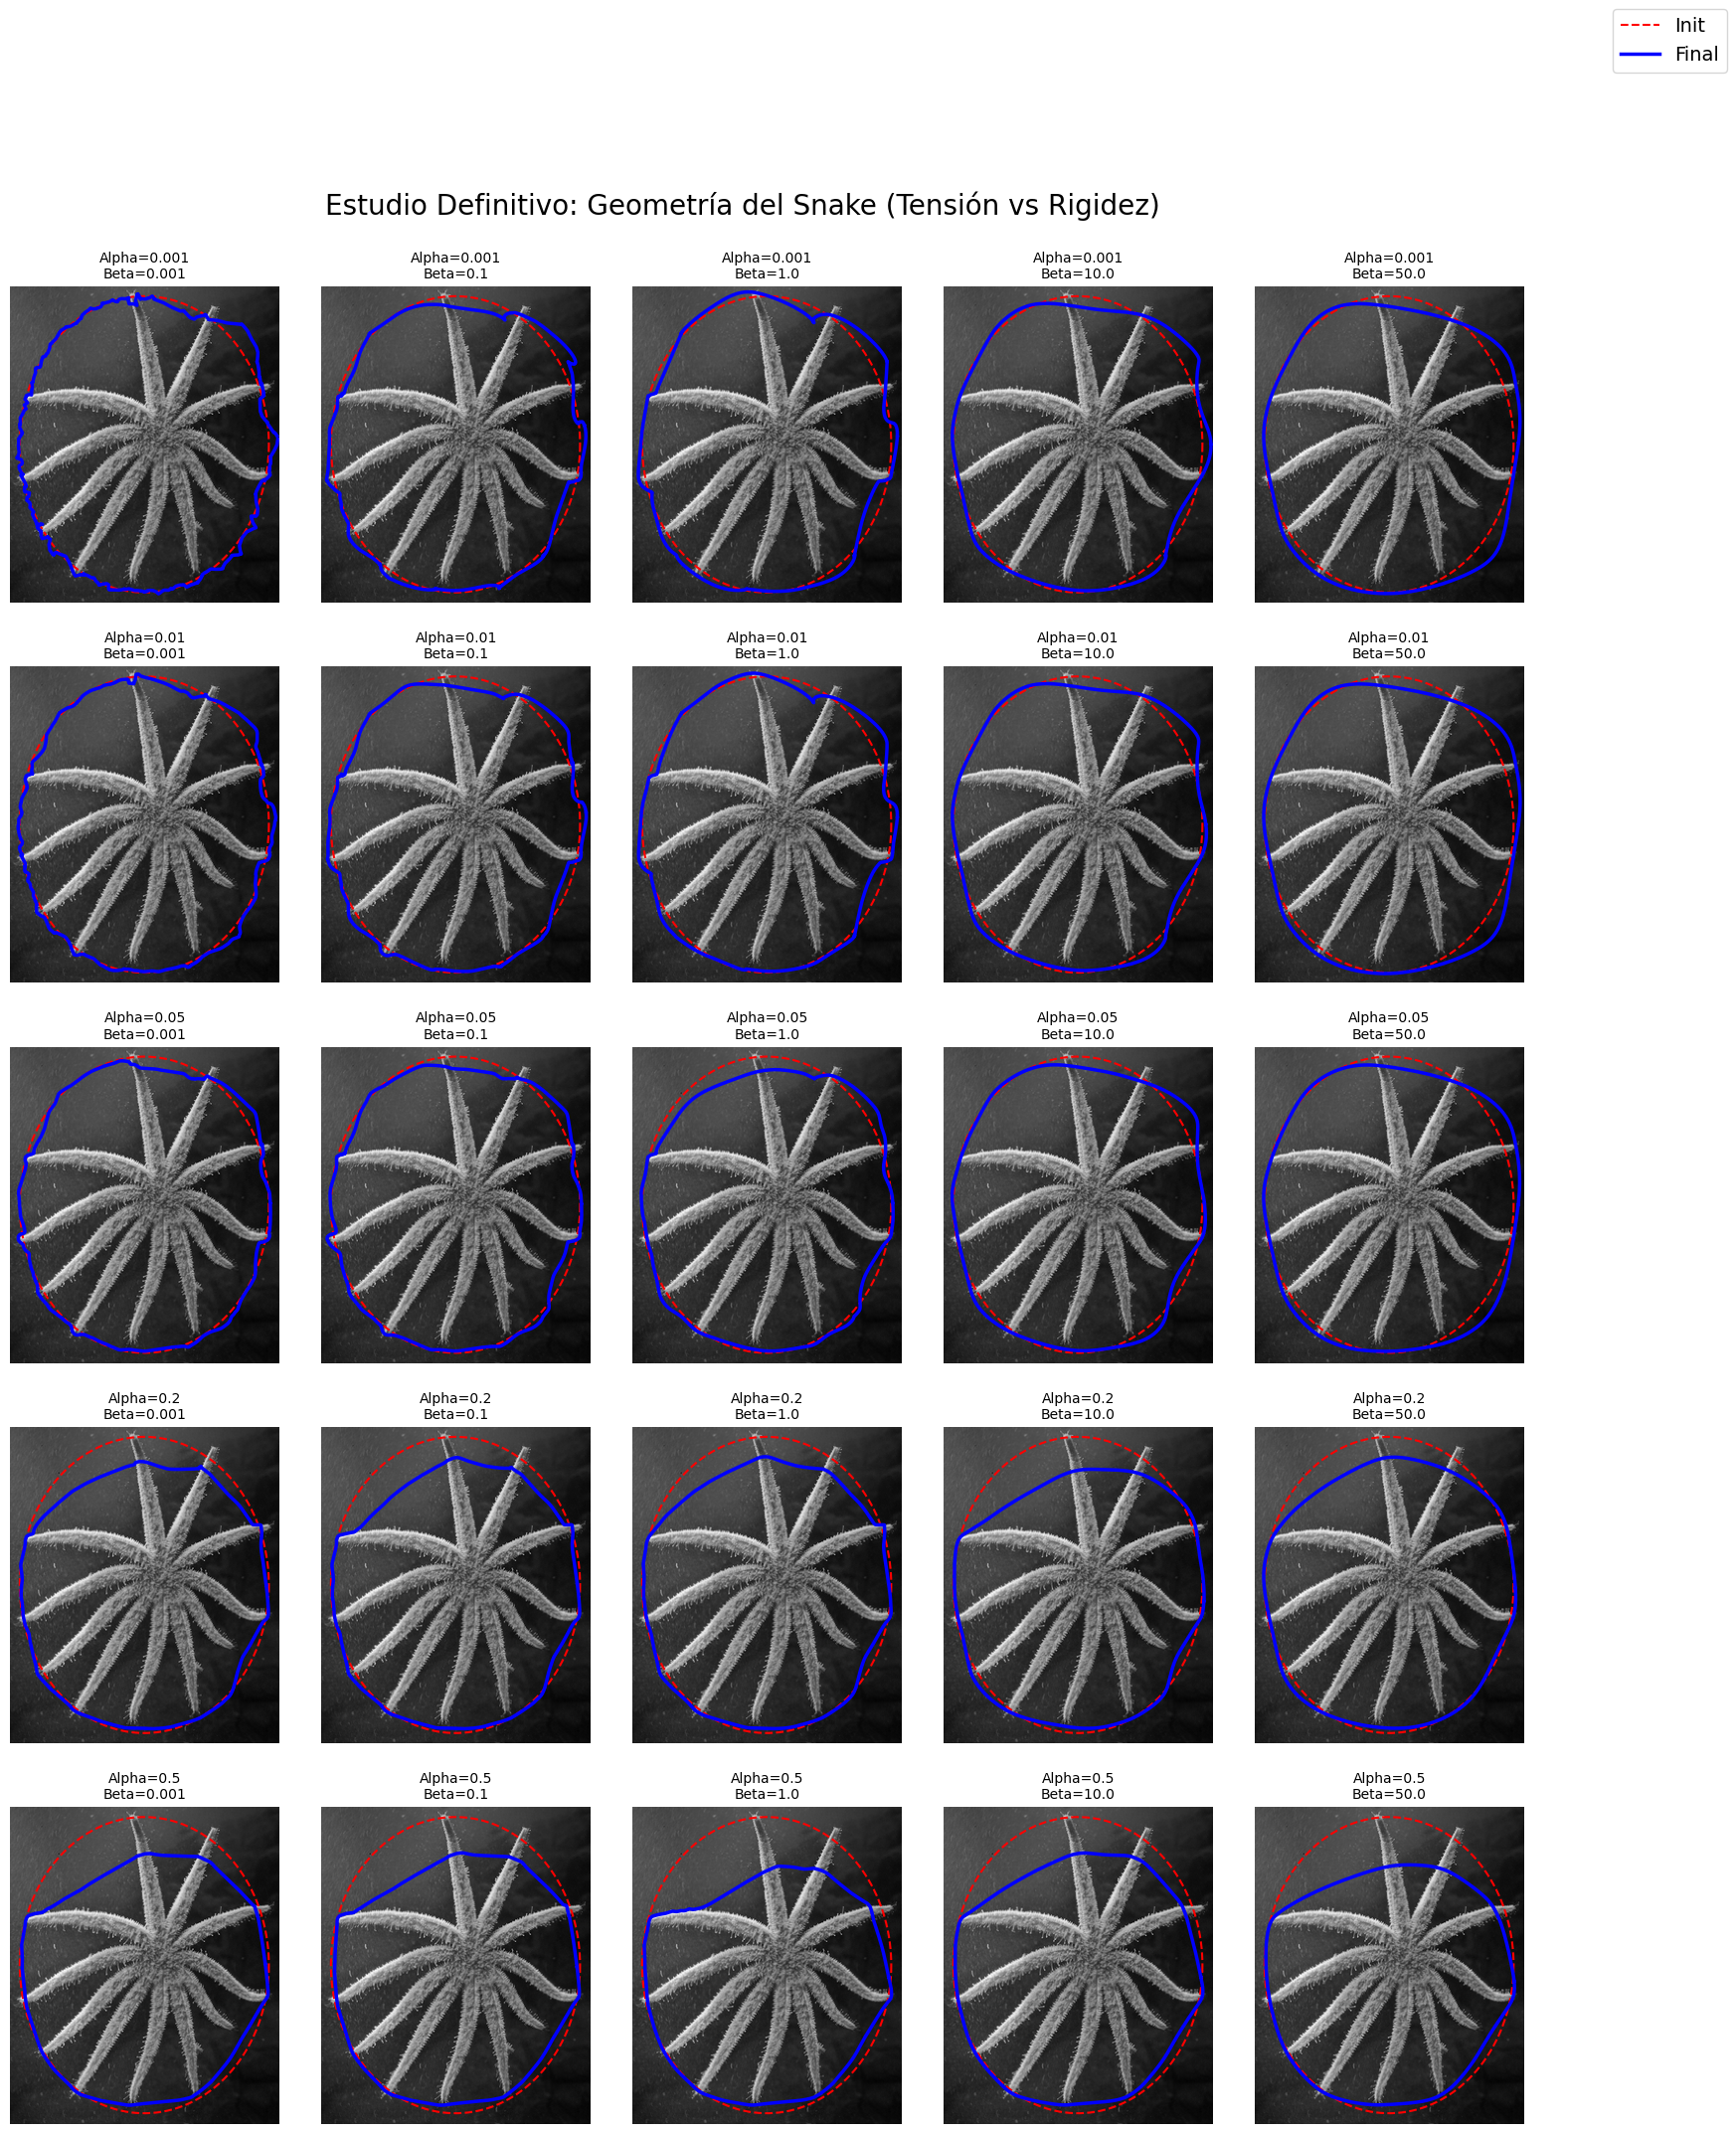

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# --- 1. CONFIGURACIÓN ---
img_path = 'images/seastar2.png'
img = io.imread(img_path)
if len(img.shape) > 2: img = color.rgb2gray(img)
img = img_as_float(img)
img_smooth = gaussian(img, 1) # Suavizado ligero
rows, cols = img.shape

# --- 2. INICIALIZACIÓN (Shrinking Snake) ---
# Círculo grande que cubre casi toda la imagen
s = np.linspace(0, 2*np.pi, 600)
r = rows//2 + (rows//2 - 10)*np.sin(s)
c = cols//2 + (cols//2 - 10)*np.cos(s)
init = np.array([r, c]).T

# --- 3. MATRIZ DE PRUEBAS (5x5) ---
# Alphas (Filas): De "Relajado" a "Muy Tenso"
alphas = [0.001, 0.01, 0.05, 0.2, 0.5] 

# Betas (Columnas): De "Líquido" a "Acero"
betas = [0.001, 0.1, 1.0, 10.0, 50.0]

# Configurar figura GRANDE para ver detalles
fig, axes = plt.subplots(5, 5, figsize=(20, 24), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.2)

print("Ejecutando Matriz de Geometría (Alpha vs Beta)...")

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        ax = axes[i, j]
        
        # PARAMETROS FIJOS DE ATRACCIÓN:
        # w_line = -2: Atracción fuerte al blanco (estrella)
        # w_edge = 2: Atracción a los bordes
        # Iteraciones altas para permitir que llegue desde el borde
        snake = active_contour(img_smooth, 
                               init, 
                               alpha=alpha, 
                               beta=beta, 
                               w_line=-2.0, 
                               w_edge=2.0, 
                               gamma=0.01, 
                               max_num_iter=2500)
        
        ax.imshow(img, cmap='gray')
        
        # Dibujar inicial (Rojo)
        ax.plot(init[:, 1], init[:, 0], '--r', lw=1.5, label='Init')
        
        # Dibujar final (Azul)
        ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2.5, label='Final')
        
        # Fijar límites para evitar zoom automático y mantener uniformidad
        ax.set_xlim(0, cols)
        ax.set_ylim(rows, 0)
        
        # Títulos descriptivos
        ax.set_title(f"Alpha={alpha}\nBeta={beta}", fontsize=10)
        ax.axis('off')

# Título general y leyenda
handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=14)
plt.suptitle("Estudio Definitivo: Geometría del Snake (Tensión vs Rigidez)", y=0.92, fontsize=20)
plt.show()

Ejecutando Matriz de Geometría para Lagos...


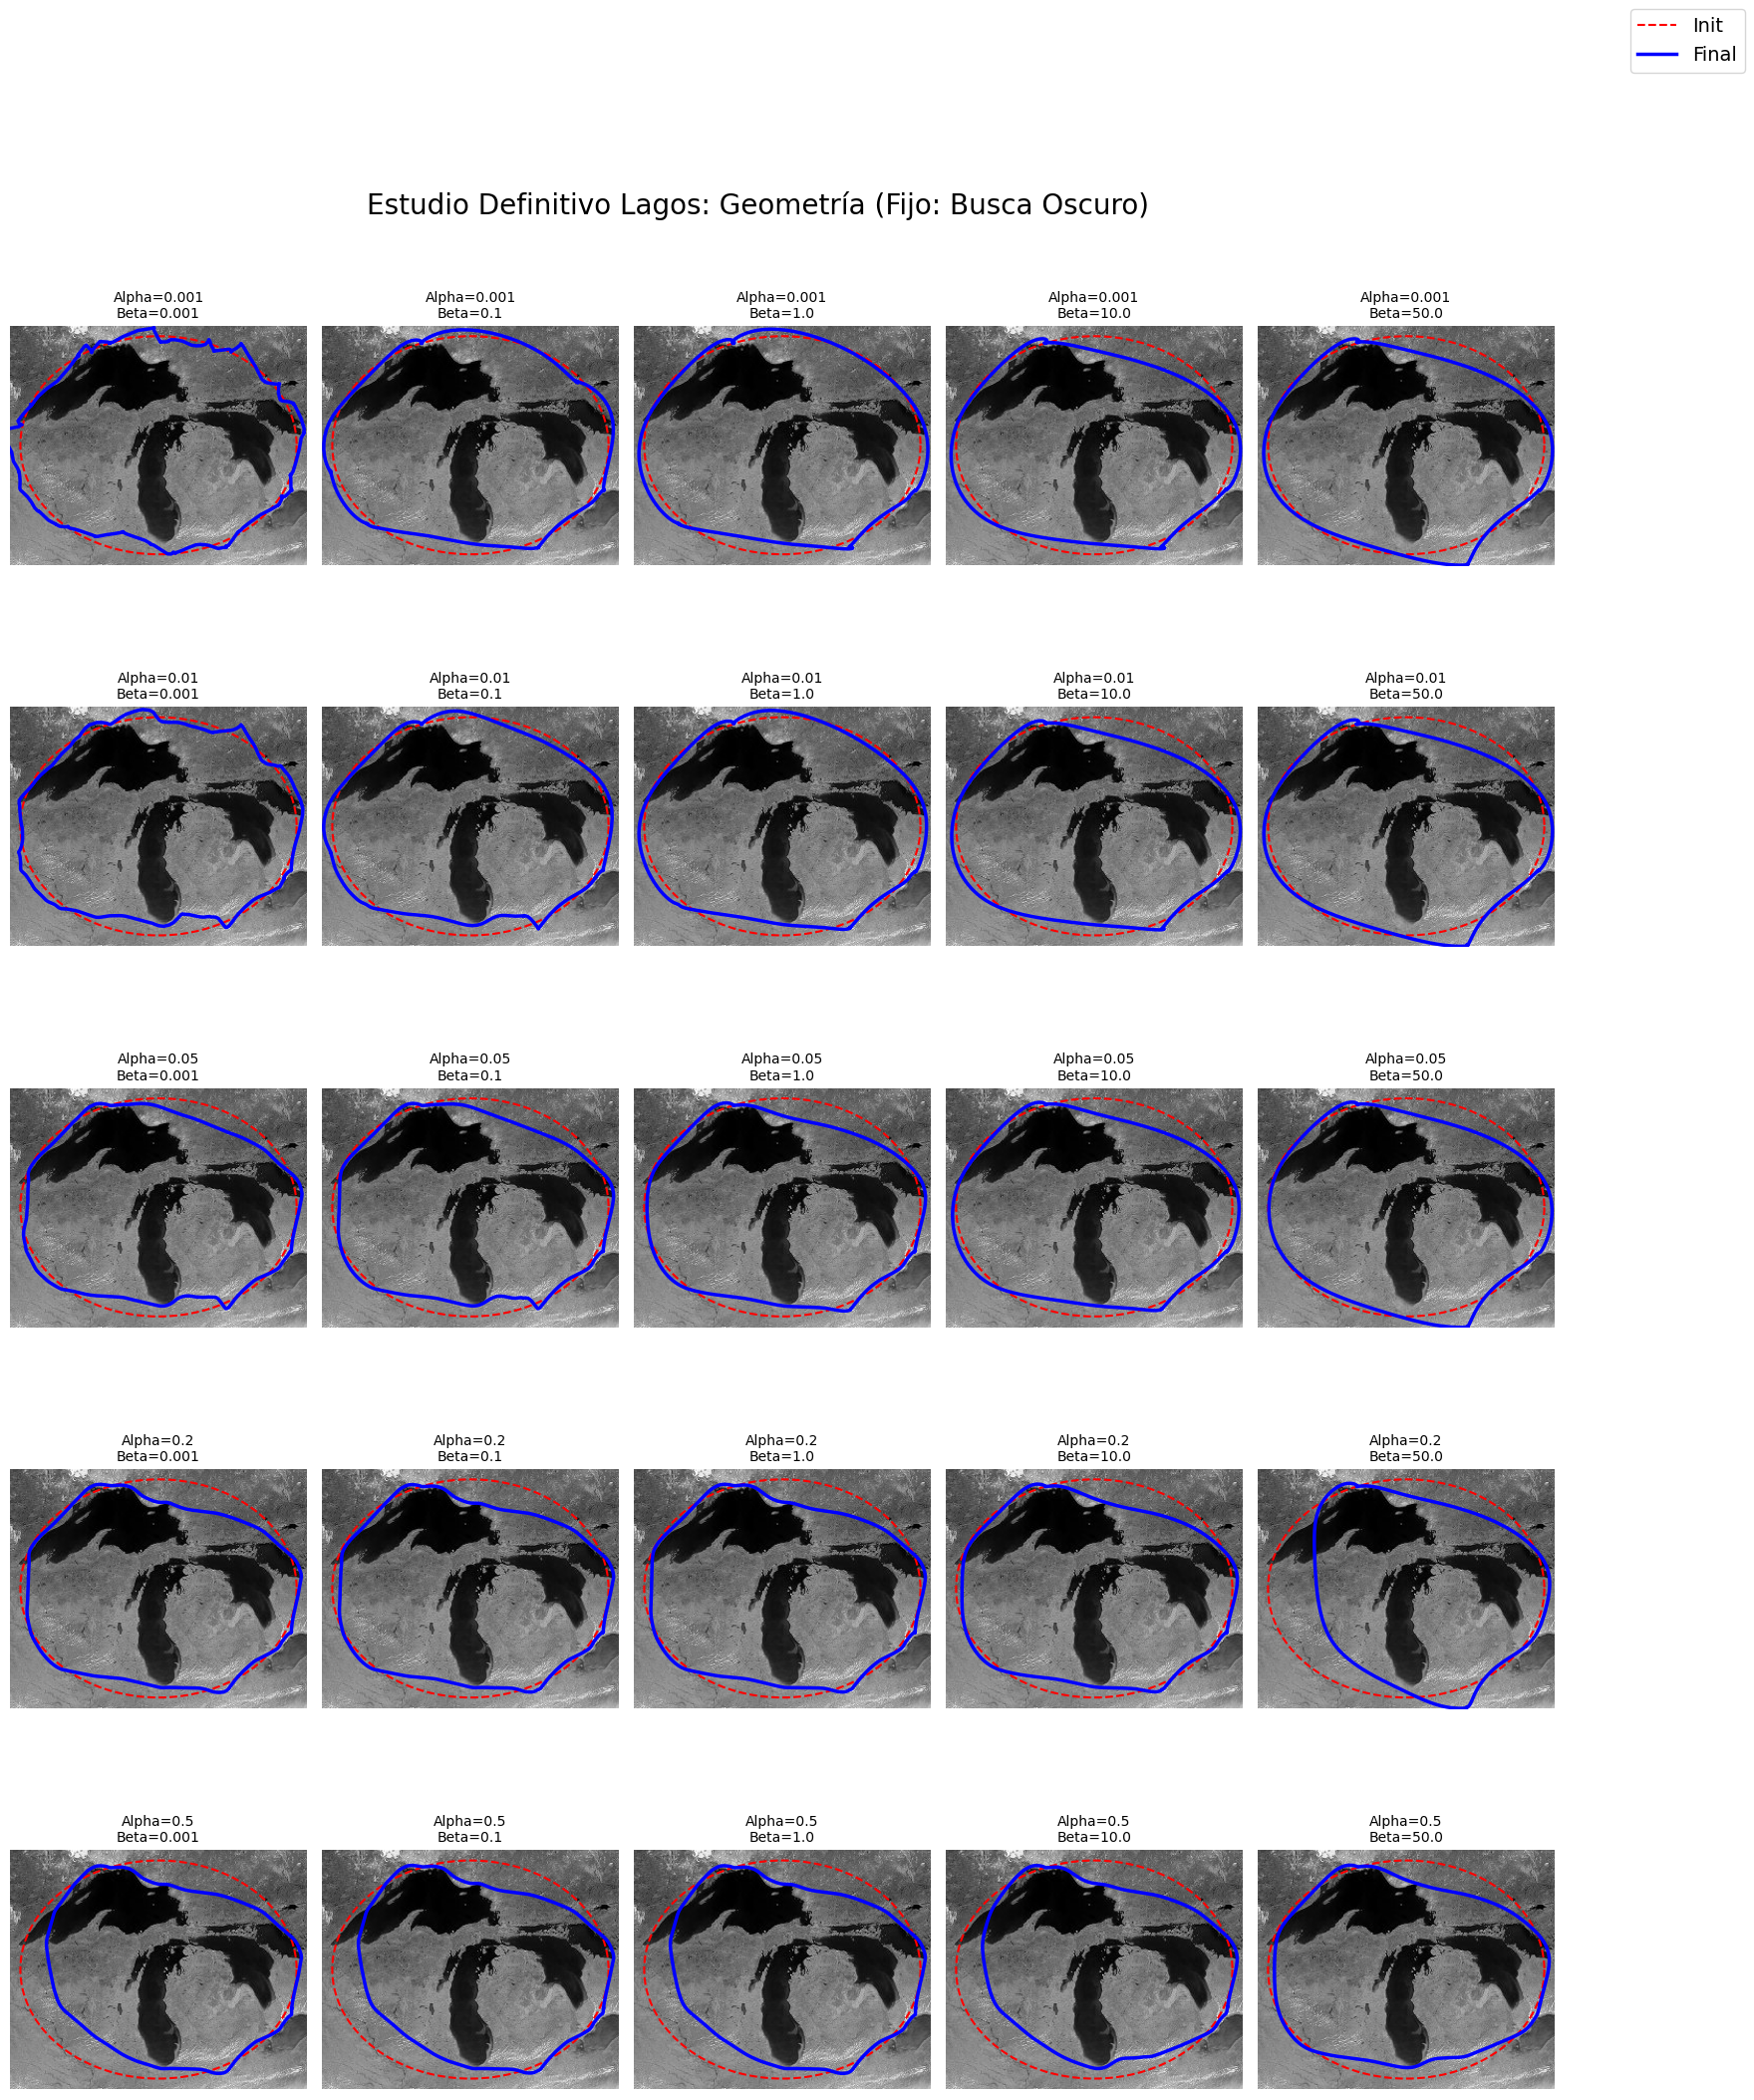

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from skimage.filters import gaussian
from skimage.segmentation import active_contour

# --- 1. CONFIGURACIÓN ---
img_path = 'images/lakes3.jpg'
img = io.imread(img_path)
if len(img.shape) > 2: img = color.rgb2gray(img)
img = img_as_float(img)
img_smooth = gaussian(img, 2) # Suavizado medio para unificar el agua
rows, cols = img.shape

# --- 2. INICIALIZACIÓN (Shrinking Snake) ---
s = np.linspace(0, 2*np.pi, 700) # Más puntos para cubrir el perímetro grande
r = rows//2 + (rows//2 - 10)*np.sin(s)
c = cols//2 + (cols//2 - 10)*np.cos(s)
init = np.array([r, c]).T

# --- 3. MATRIZ DE PRUEBAS (5x5) ---
# Alphas: De muy elástico a muy tenso
alphas = [0.001, 0.01, 0.05, 0.2, 0.5] 
# Betas: De líquido a muy rígido
betas = [0.001, 0.1, 1.0, 10.0, 50.0]

fig, axes = plt.subplots(5, 5, figsize=(20, 24), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.2)

print("Ejecutando Matriz de Geometría para Lagos...")

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        ax = axes[i, j]
        
        # PARAMETROS FIJOS OPTIMIZADOS PARA LAGOS:
        # w_line = 2.0: Positivo atrae a zonas OSCURAS (Agua)
        # w_edge = 2.0: Fuerte atracción a los bordes de la costa
        snake = active_contour(img_smooth, 
                               init, 
                               alpha=alpha, 
                               beta=beta, 
                               w_line=2.0, 
                               w_edge=2.0, 
                               gamma=0.01, 
                               max_num_iter=2000)
        
        ax.imshow(img, cmap='gray')
        ax.plot(init[:, 1], init[:, 0], '--r', lw=1.5, label='Init')
        ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2.5, label='Final')
        
        # Fijar límites exactos
        ax.set_xlim(0, cols)
        ax.set_ylim(rows, 0)
        
        ax.set_title(f"Alpha={alpha}\nBeta={beta}", fontsize=10)
        ax.axis('off')

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=14)
plt.suptitle("Estudio Definitivo Lagos: Geometría (Fijo: Busca Oscuro)", y=0.92, fontsize=20)
plt.show()

Ejecutando Matriz de Geometría para Ecografía...


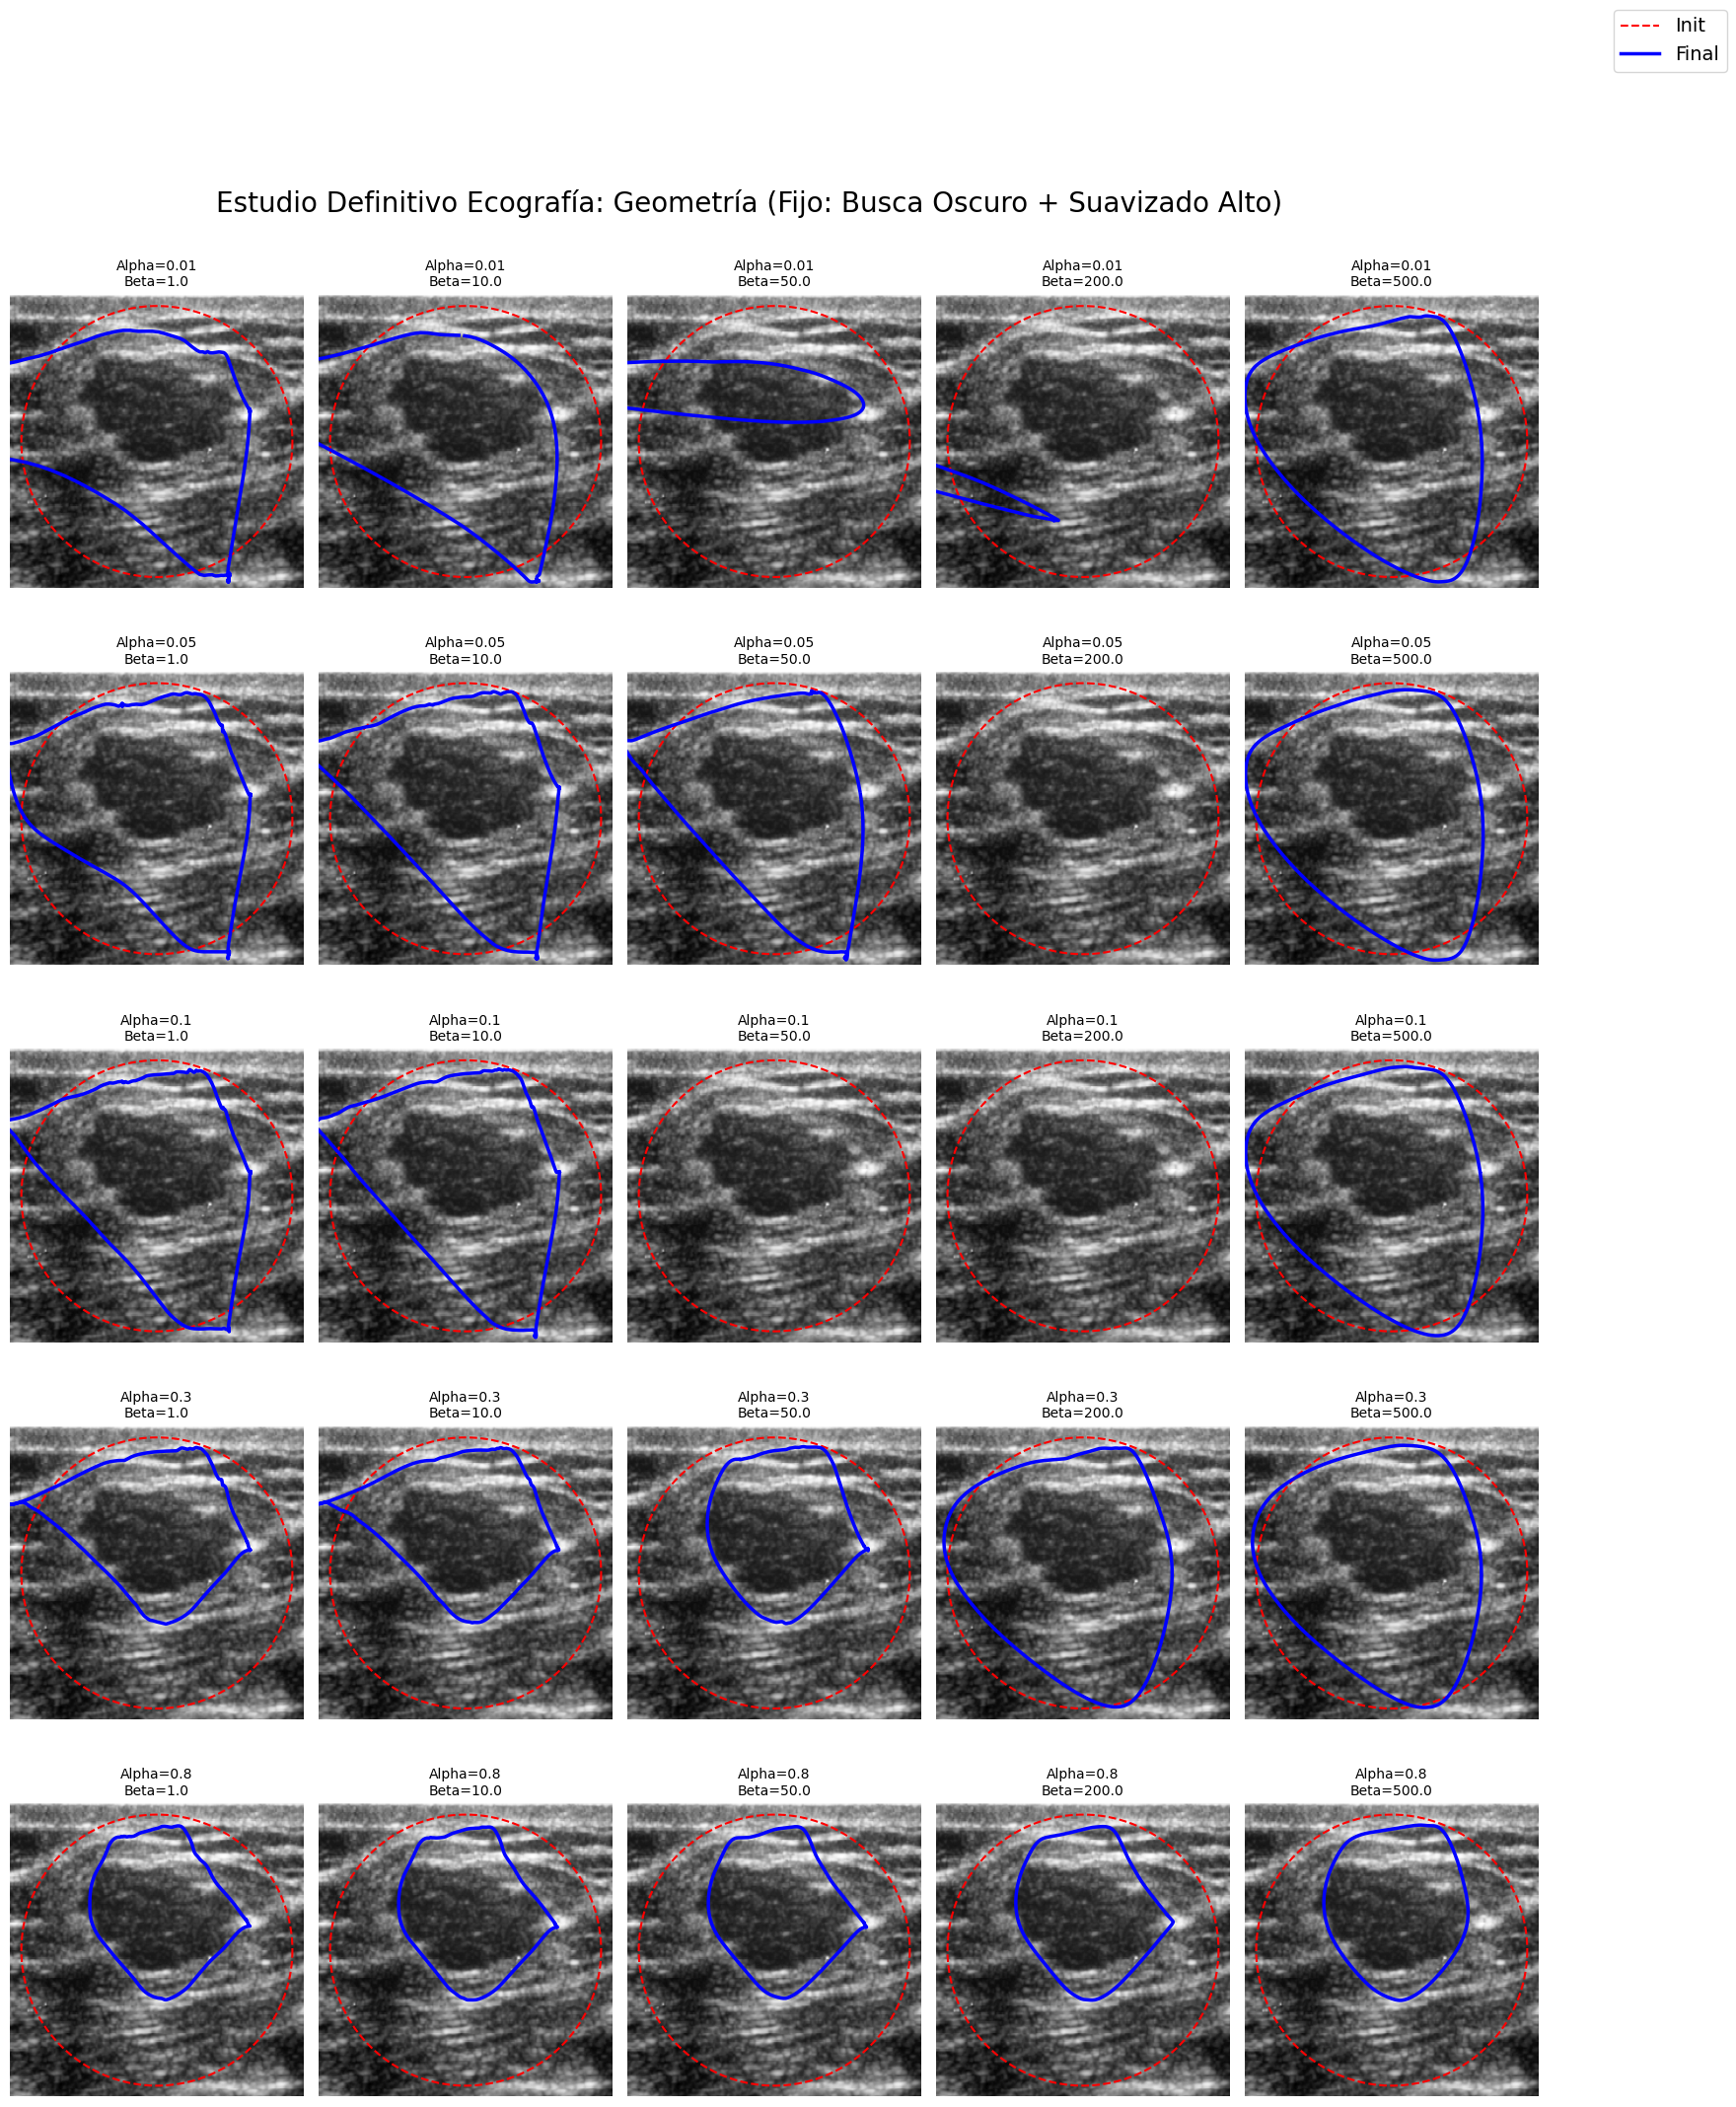

In [4]:
# --- 1. CONFIGURACIÓN ---
img_path = 'images/mama07ORI.bmp'
img = io.imread(img_path)
if len(img.shape) > 2: img = color.rgb2gray(img)
img = img_as_float(img)
# Suavizado MUY FUERTE para eliminar ruido speckle y facilitar el viaje desde el borde
img_smooth = gaussian(img, 4) 
rows, cols = img.shape

# --- 2. INICIALIZACIÓN (Shrinking Snake) ---
s = np.linspace(0, 2*np.pi, 500)
r = rows//2 + (rows//2 - 10)*np.sin(s)
c = cols//2 + (cols//2 - 10)*np.cos(s)
init = np.array([r, c]).T

# --- 3. MATRIZ DE PRUEBAS (5x5) ---
# Alphas: Tensión (necesitamos cierta tensión para cruzar el ruido)
alphas = [0.01, 0.05, 0.1, 0.3, 0.8]
# Betas: Rigidez (Valores ALTOS para forzar formas suaves tipo tumor)
betas = [1.0, 10.0, 50.0, 200.0, 500.0]

fig, axes = plt.subplots(5, 5, figsize=(20, 24), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.05, hspace=0.2)

print("Ejecutando Matriz de Geometría para Ecografía...")

for i, alpha in enumerate(alphas):
    for j, beta in enumerate(betas):
        ax = axes[i, j]
        
        # PARAMETROS FIJOS OPTIMIZADOS PARA ECOGRAFÍA:
        # w_line = 2.0: Positivo atrae a zonas OSCURAS (Nódulo)
        # w_edge = 5.0: Muy alta atracción a bordes para frenar cuando llegue
        snake = active_contour(img_smooth, 
                               init, 
                               alpha=alpha, 
                               beta=beta, 
                               w_line=2.0, 
                               w_edge=5.0, 
                               gamma=0.001, # Gamma bajo para paso estable
                               max_num_iter=1500)
        
        ax.imshow(img, cmap='gray')
        ax.plot(init[:, 1], init[:, 0], '--r', lw=1.5, label='Init')
        ax.plot(snake[:, 1], snake[:, 0], '-b', lw=2.5, label='Final')
        
        # Fijar límites exactos
        ax.set_xlim(0, cols)
        ax.set_ylim(rows, 0)
        
        ax.set_title(f"Alpha={alpha}\nBeta={beta}", fontsize=10)
        ax.axis('off')

handles, labels = axes[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper right', fontsize=14)
plt.suptitle("Estudio Definitivo Ecografía: Geometría (Fijo: Busca Oscuro + Suavizado Alto)", y=0.92, fontsize=20)
plt.show()

# Morphological snakes

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, img_as_float
from scipy import ndimage as ndi
from itertools import cycle
from sklearn.metrics import confusion_matrix

# ==============================================================================
# CÓDIGO DEL REPOSITORIO pmneila/morphsnakes
# ==============================================================================

class MorphologicalSnake(object):
    """Clase base del repositorio pmneila/morphsnakes"""
    def __init__(self, data, smoothing=1, lambda1=1, lambda2=1):
        self.data = data
        self.smoothing = smoothing
        self.lambda1 = lambda1
        self.lambda2 = lambda2
        self._u = None # Level set

    def set_levelset(self, u):
        self._u = np.double(u)
        self._u[u > 0] = 1
        self._u[u <= 0] = 0

    def _curve_op(self, u):
        # Operador de curvatura (suavizado) usando SI y IS
        P2 = [np.eye(3), np.array([[0, 1, 0]] * 3), np.flipud(np.eye(3)), np.rot90([[0, 1, 0]] * 3)]
        
        def supin(u):
            return np.array([ndi.binary_erosion(u, structure=P) for P in P2], dtype=np.int8).max(0)
        
        def infsup(u):
            return np.array([ndi.binary_dilation(u, structure=P) for P in P2], dtype=np.int8).min(0)
            
        return supin(infsup(u)) # SI o IS

    def step(self):
        pass

class MorphACWE(MorphologicalSnake):
    """Active Contours Without Edges (Chan-Vese) - Repositorio pmneila"""
    def __init__(self, data, smoothing=1, lambda1=1, lambda2=1):
        super(MorphACWE, self).__init__(data, smoothing, lambda1, lambda2)

    def step(self):
        u = self._u
        data = self.data
        
        inside = u > 0
        outside = u <= 0
        
        c1 = data[inside].mean() if np.any(inside) else 0
        c0 = data[outside].mean() if np.any(outside) else 0

        # Fuerza de ajuste de imagen
        aux = (data - c1)**2 - (data - c0)**2 # Simplificado lambda=1
        
        res = np.copy(u)
        res[aux < 0] = 1
        res[aux > 0] = 0

        for _ in range(self.smoothing):
            res = self._curve_op(res)

        self._u = res

def gborders(img, alpha=1.0, sigma=1.0):
    """Función g(I) del repositorio para detectar bordes"""
    gradnorm = ndi.gaussian_gradient_magnitude(img, sigma, mode='nearest')
    return 1.0 / np.sqrt(1.0 + alpha * gradnorm)

class MorphGAC(MorphologicalSnake):
    """Geodesic Active Contours (GAC) - Repositorio pmneila"""
    def __init__(self, data, smoothing=1, threshold=0, balloon=0):
        super(MorphGAC, self).__init__(data, smoothing)
        self.balloon = balloon
        self.threshold = threshold

    def step(self):
        u = self._u
        gI = self.data
        res = np.copy(u)

        # 1. Balloon (Expansión/Contracción)
        if self.balloon > 0:
            aux = ndi.binary_dilation(u)
        elif self.balloon < 0:
            aux = ndi.binary_erosion(u)
        else:
            aux = u
            
        mask = gI > self.threshold
        res[mask] = aux[mask]

        # 2. Smoothing (Curvatura)
        for _ in range(self.smoothing):
            res = self._curve_op(res)
            
        self._u = res

# --- UTILIDADES DE INICIALIZACIÓN ---
def circle_level_set(shape, center, radius):
    r, c = np.mgrid[:shape[0], :shape[1]]
    dist = np.sqrt((r - center[0])**2 + (c - center[1])**2)
    return (dist <= radius).astype(float)

def checkerboard_level_set(shape, square_size=5):
    y, x = np.mgrid[:shape[0], :shape[1]]
    return ((x // square_size) + (y // square_size)) % 2

# --- VISUALIZACIÓN Y MÉTRICAS (Tu petición) ---
def calculate_metrics(ground_truth, prediction):
    gt = ground_truth.astype(bool).flatten()
    pred = prediction.astype(bool).flatten()
    tn, fp, fn, tp = confusion_matrix(gt, pred, labels=[False, True]).ravel()
    
    sens = tp / (tp + fn) if (tp + fn) > 0 else 0
    spec = tn / (tn + fp) if (tn + fp) > 0 else 0
    prec = tp / (tp + fp) if (tp + fp) > 0 else 0
    return sens, spec, prec

def plot_full_analysis(original, gt, result, title):
    sens, spec, prec = calculate_metrics(gt, result)
    
    fig, axes = plt.subplots(1, 4, figsize=(20, 5))
    fig.suptitle(title, fontsize=16)
    
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title("1. Original")
    
    axes[1].imshow(original, cmap='gray')
    axes[1].contour(result, [0.5], colors='r', linewidths=2)
    axes[1].set_title("2. Segmentación (Contorno)")
    
    axes[2].imshow(gt, cmap='gray')
    axes[2].set_title("3. Ground Truth")
    
    axes[3].imshow(result, cmap='gray')
    axes[3].set_title("4. Máscara Resultado")
    
    for ax in axes: ax.axis('off')
    plt.tight_layout()
    plt.show()
    
    print(f"--- RESULTADOS MATEMÁTICOS ({title}) ---")
    print(f"Sensibilidad: {sens:.4f}")
    print(f"Especificidad: {spec:.4f}")
    print(f"Precisión:     {prec:.4f}")
    print("-" * 40)

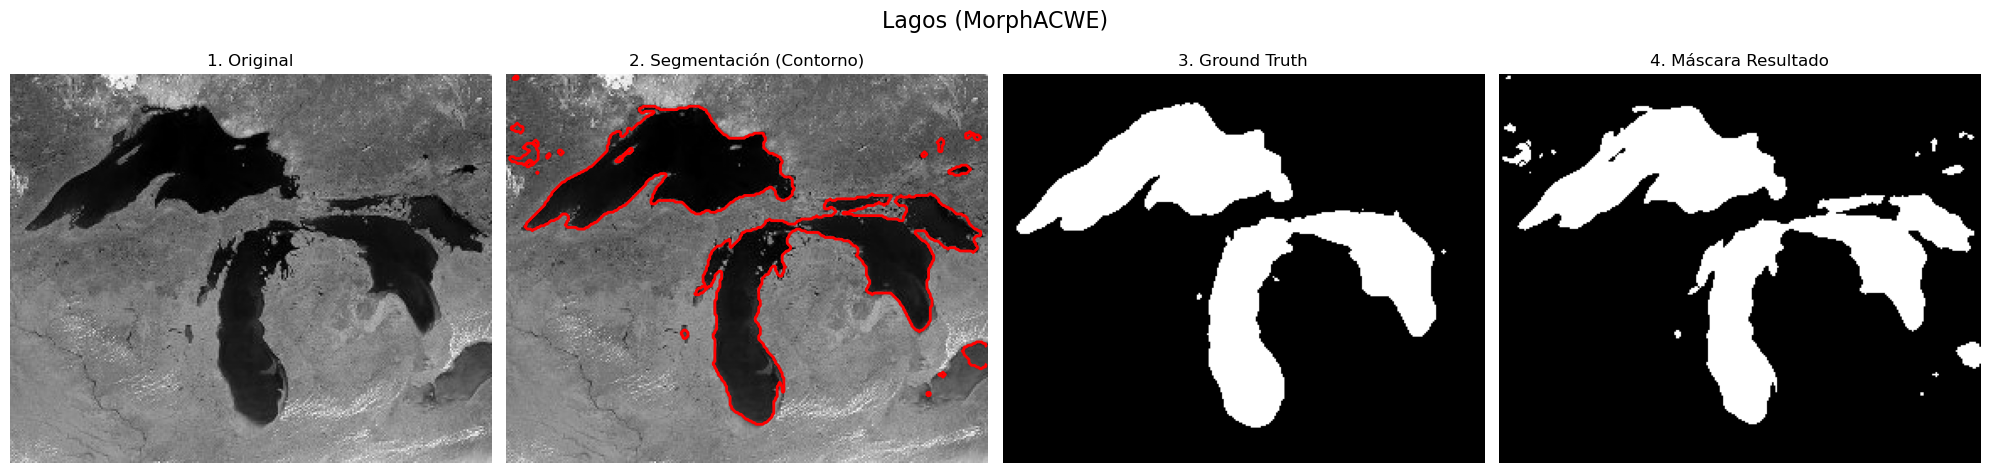

--- RESULTADOS MATEMÁTICOS (Lagos (MorphACWE)) ---
Sensibilidad: 0.8651
Especificidad: 0.9635
Precisión:     0.8577
----------------------------------------


In [15]:
# --- LAGOS ---
img = io.imread('images/lakes3.jpg')
gt = io.imread('images/Mascara_lagos.png', as_gray=True) > 0

# Preprocesamiento
if img.ndim == 3: img = color.rgb2gray(img)
img = img_as_float(img)

# Configuración del repositorio
# Usamos MorphACWE: funciona separando por medias, ideal para lagos.
# Inicialización: Checkerboard para cubrir toda la imagen.
init_ls = checkerboard_level_set(img.shape, square_size=10)

msnake = MorphACWE(img, smoothing=3, lambda1=1, lambda2=1)
msnake.set_levelset(init_ls)

# Iterar
for _ in range(200):
    msnake.step()

# Corrección de inversión (Chan-Vese a veces invierte fondo/forma)
result = msnake._u
if result.mean() > 0.5: result = 1 - result

plot_full_analysis(img, gt, result, "Lagos (MorphACWE)")

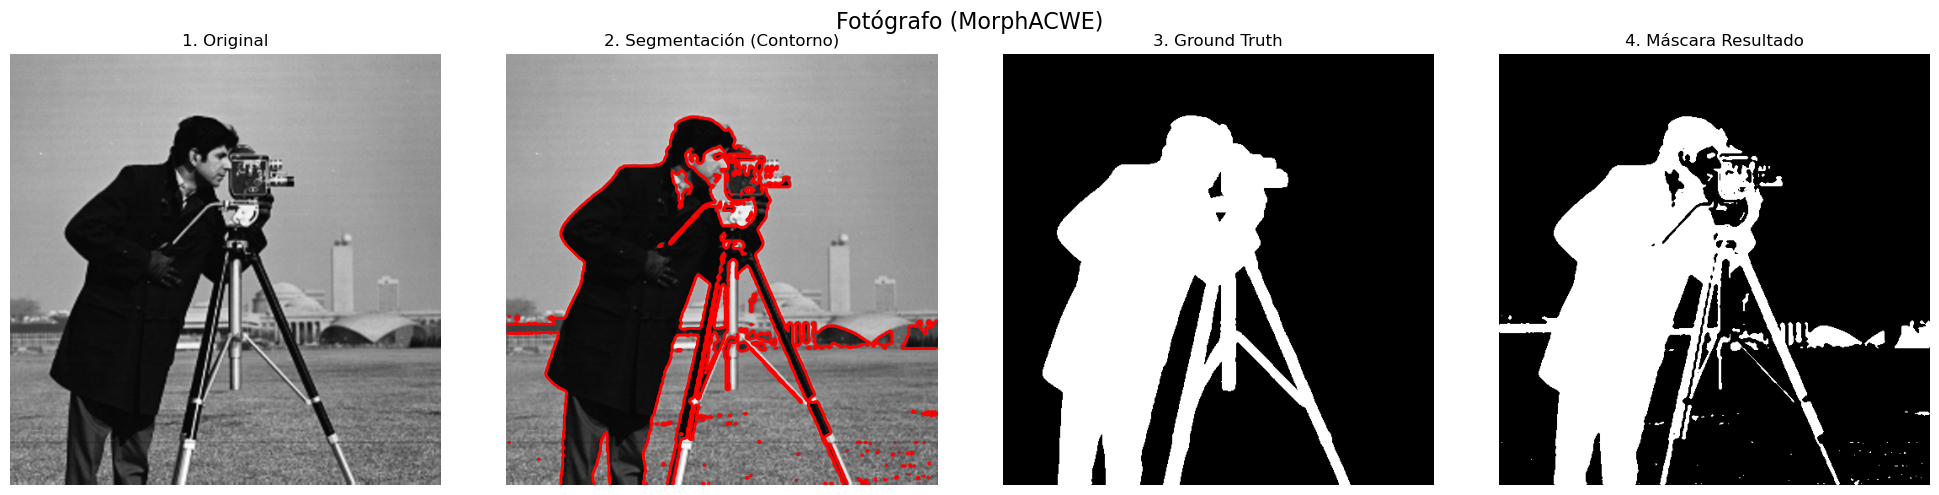

--- RESULTADOS MATEMÁTICOS (Fotógrafo (MorphACWE)) ---
Sensibilidad: 0.8435
Especificidad: 0.9748
Precisión:     0.9318
----------------------------------------


In [16]:
# --- FOTÓGRAFO ---
img = io.imread('images/camera.png')
gt = io.imread('images/Mascara_Fotografo.png', as_gray=True) > 0

if img.ndim == 3: img = color.rgb2gray(img)
img = img_as_float(img)

# Inicialización: Círculo en el centro del fotógrafo
init_ls = circle_level_set(img.shape, (200, 250), 100)

# MorphACWE
msnake = MorphACWE(img, smoothing=1, lambda1=1, lambda2=1)
msnake.set_levelset(init_ls)

for _ in range(150):
    msnake.step()

plot_full_analysis(img, gt, msnake._u, "Fotógrafo (MorphACWE)")

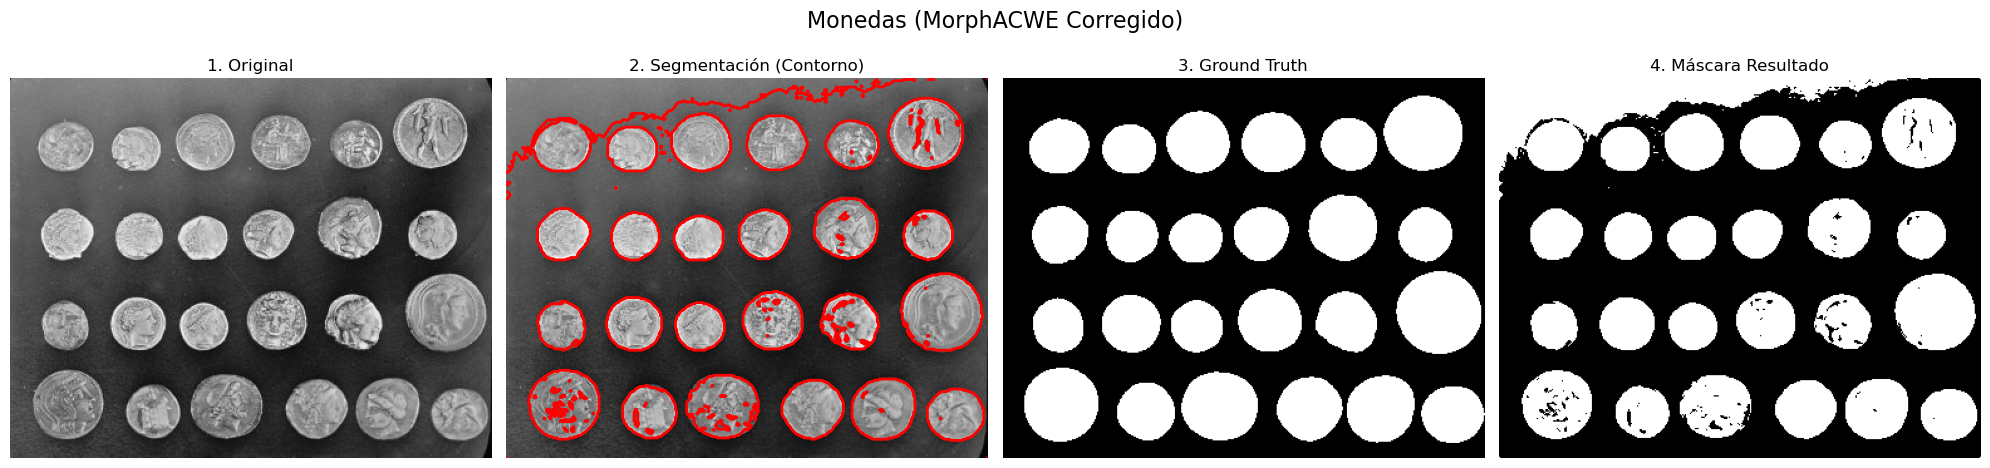

--- RESULTADOS MATEMÁTICOS (Monedas (MorphACWE Corregido)) ---
Sensibilidad: 0.8345
Especificidad: 0.8890
Precisión:     0.8297
----------------------------------------


In [19]:
# --- MONEDAS (CORREGIDO) ---
# Cambiamos a MorphACWE (Chan-Vese) porque es mucho más estable para 
# rellenar objetos sólidos (monedas) que buscar sus bordes con GAC.

img = io.imread('images/coins.png')
gt = io.imread('images/Mascara_monedas.png', as_gray=True) > 0

# Preprocesamiento
if img.ndim == 3: img = color.rgb2gray(img)
img = img_as_float(img)

# 1. Inicialización: Tablero de Ajedrez (Checkerboard)
# Usamos un tamaño de cuadro un poco más pequeño (15) para asegurar 
# que caen semillas dentro de todas las monedas, incluso las pequeñas.
init_ls = checkerboard_level_set(img.shape, square_size=15)

# 2. Configuración MorphACWE
# smoothing=1: Poco suavizado para que el contorno se pegue bien a la forma circular
# lambda1=1, lambda2=1: Pesos estándar para separar fondo/objeto
msnake = MorphACWE(img, smoothing=1, lambda1=1, lambda2=1)
msnake.set_levelset(init_ls)

# 3. Iteración
# 250 iteraciones suelen ser suficientes para que las regiones se unifiquen
for _ in range(250):
    msnake.step()

# 4. Corrección de Inversión Automática
# Chan-Vese separa la imagen en dos regiones (A y B). No sabe cuál es el "objeto".
# Como las monedas ocupan menos espacio que el fondo, si la máscara resultante 
# tiene más de un 50% de unos, significa que ha seleccionado el fondo -> Invertimos.
result = msnake._u
if result.mean() > 0.5:
    result = 1 - result

plot_full_analysis(img, gt, result, "Monedas (MorphACWE Corregido)")

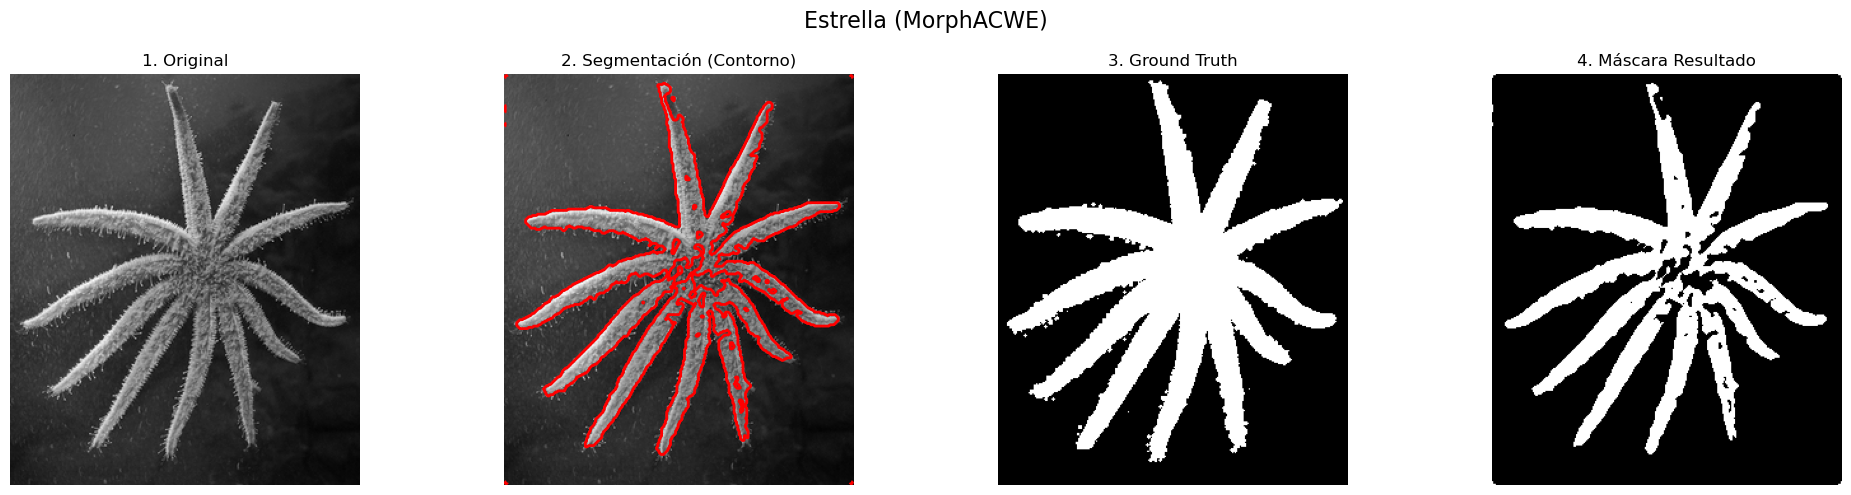

--- RESULTADOS MATEMÁTICOS (Estrella (MorphACWE)) ---
Sensibilidad: 0.7000
Especificidad: 0.9994
Precisión:     0.9980
----------------------------------------


In [22]:
# --- ESTRELLA DE MAR ---
img = io.imread('images/seastar2.png')
gt = io.imread('images/Mascara_estrella.png', as_gray=True) > 0

if img.ndim == 3: img = color.rgb2gray(img)
img = img_as_float(img)

# Inicialización: Círculo grande
init_ls = circle_level_set(img.shape, (250, 250), 200)

# MorphACWE
# smoothing=3 o 4 es clave aquí para que el contorno sea rígido y no entre en los huecos de la textura
msnake = MorphACWE(img, smoothing=3, lambda1=1, lambda2=1)
msnake.set_levelset(init_ls)

for _ in range(400):
    msnake.step()

# Corrección de inversión automática si captura el fondo
result = msnake._u
if result.mean() > 0.5: result = 1 - result

plot_full_analysis(img, gt, result, "Estrella (MorphACWE)")